# Mouse bone marrow scRNA-seq analysis
This notebook generates major results in Figures 1, 2, 4, S1, S2, S4 and S7

In [5]:
# Load package
suppressWarnings(suppressPackageStartupMessages({
    library(Seurat)
    library(ggplot2)
    library(dplyr)
    library(scCustomize)
    library(clusterProfiler)
    library(org.Mm.eg.db)
    library(msigdbr)
}))

In [6]:
# Color code
mycolors3 = c("#418abd","#ADC6E6","#98DF89","#2FA12E","#2a661d",
              "#8E8E8E","#e3c702","#A2DBE5","#BDBC23","#956ABE",
              "#34BECF", "#C7C7C7","#C5B1D6","#F97F10", "#FBBE7F",
              "#E67D7E","#FBC1C2","#DCC3BF","#BA9994","#E276C2","#F7B8D3")

# Fig size setting
fig_size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width)
}

In [7]:
# Load integrated data
combined<-readRDS( file = "/Users/yujiaohan/Princeton Dropbox/Yujiao Han/0-My Dropbox/Manuscript/Yujiao_Manuscript_v4/dataflie/niche_normal_distal_integrated_umap.rds")

In [8]:
# Rename cell type
combined.renamed <- RenameIdents(object = combined, 
                               "0" = "Neutrophils_d",
                               "1" = "Neutrophils_a",
                               "2" = "Neutrophils_c",
                               "3" = "Immature B cells",
                               "4" = "Macrophages_a",
                               "5" = "Neutrophils_e",
                               "6" = "Neutrophil progenitors",
                               "7" = "Neutrophils_b",
                               "8" = "GMPs",
                               "9" = "T cells_a",
                               "10" = "Macrophages_b",
                               "11" = "T cells_b",
                               "12" = "DCs",
                               "13" = "Macrophages_c",
                               "14" = "Erythroblasts",
                               "15" = "Neutrophils_f",
                               "16" = "Pre-B cells",
                               "17" = "MEPs", 
                               "18" = "Basophils",
                               "19" = "Pro-B cells", 
                               "20" = "CLPs")
my_levels <-  c("T cells_b","T cells_a",
                "Immature B cells","Pre-B cells","Pro-B cells","CLPs",
                "Erythroblasts","MEPs",
                "DCs","Macrophages_c","Macrophages_b","Macrophages_a","GMPs",
                "Neutrophil progenitors",
                "Neutrophils_a","Neutrophils_b","Neutrophils_c",
                "Neutrophils_d","Neutrophils_e","Neutrophils_f",
                "Basophils")
Idents(combined.renamed) <- factor(Idents(combined.renamed), 
                                   levels= my_levels)

## Figure 1

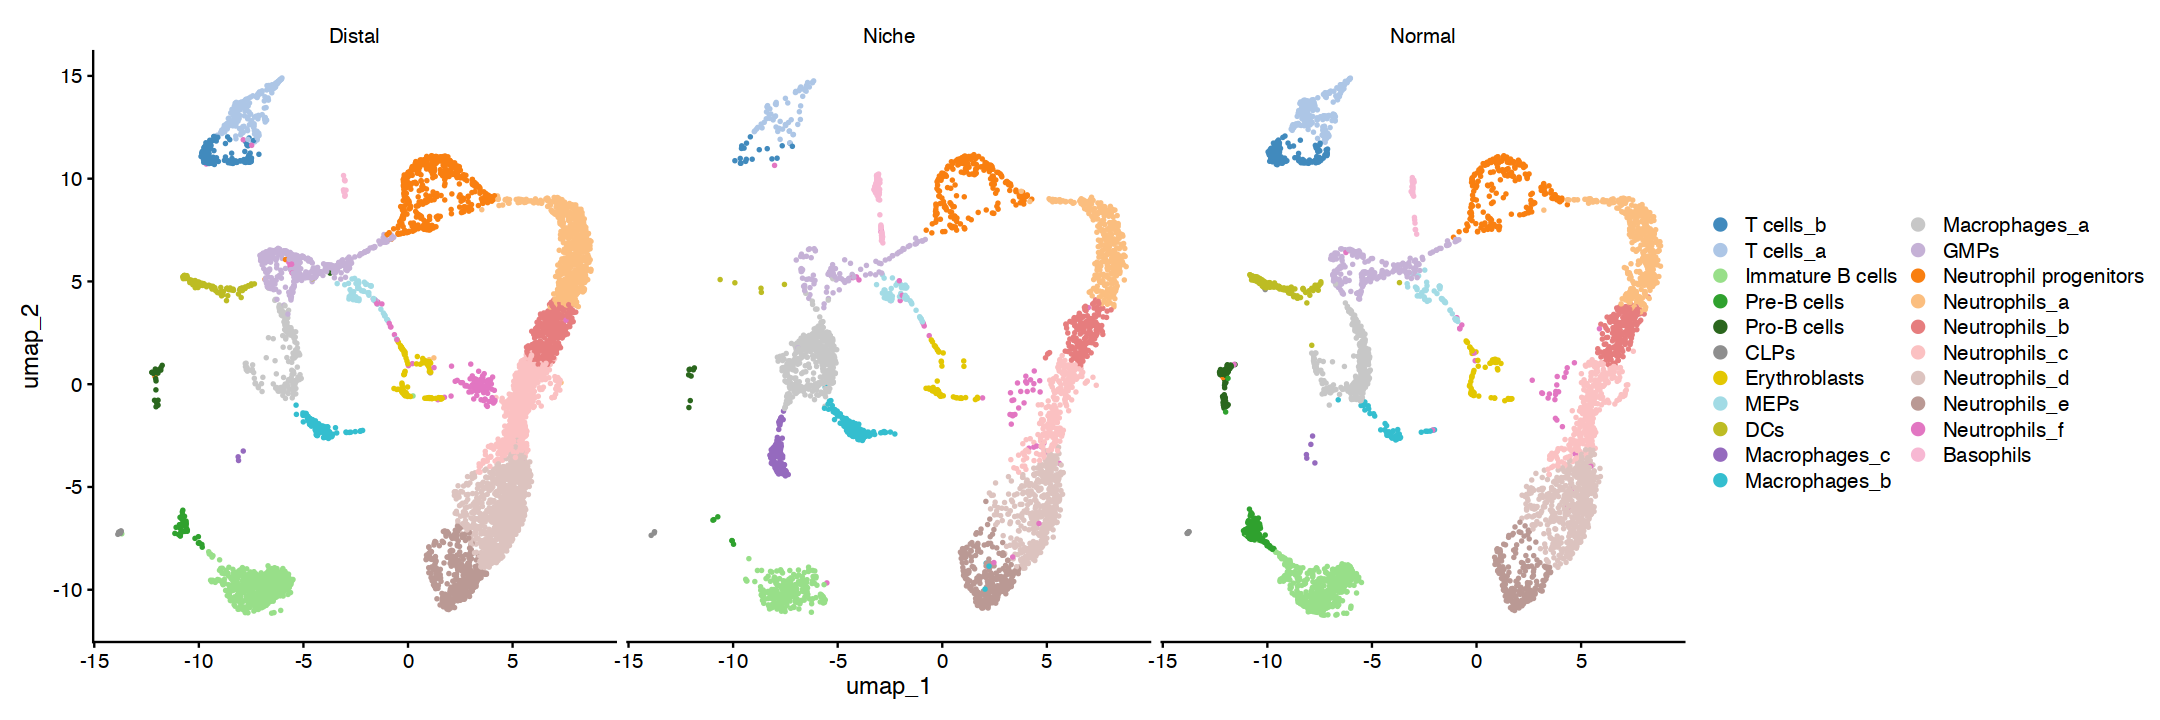

In [9]:
fig_size(6, 18)
DimPlot(combined.renamed, 
        reduction ="umap", 
        cols = mycolors3, 
        pt.size=0.5,
        split.by = "orig.ident") 

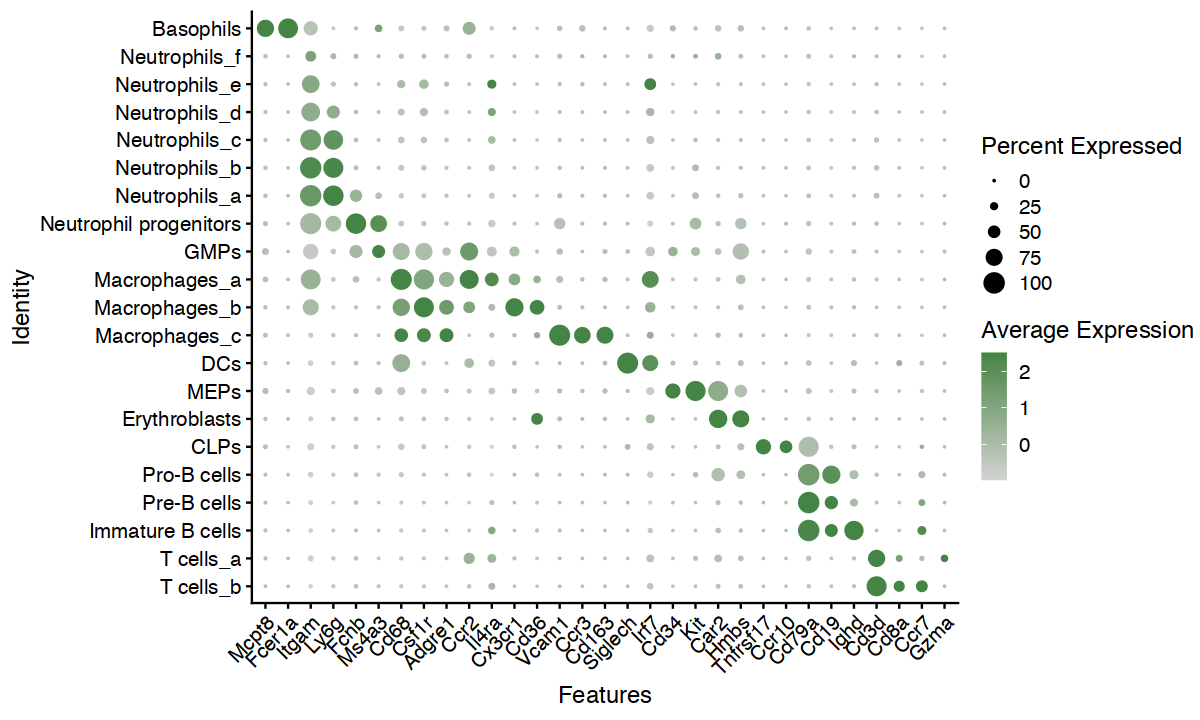

In [10]:
# Plot marker genes in desired order
DefaultAssay(combined.renamed) <- "RNA"
Markergenes = c("Mcpt8","Fcer1a",
                'Itgam', 'Ly6g',"Fcnb","Ms4a3",
                'Cd68','Csf1r','Adgre1',
                'Ccr2',"Il4ra",'Cx3cr1',"Cd36",'Vcam1','Ccr3','Cd163',
                'Siglech',"Irf7",
                "Cd34","Kit",
                'Car2','Hmbs',
                "Tnfrsf17","Ccr10",
                'Cd79a','Cd19',"Ighd",
                'Cd3d',"Cd8a","Ccr7","Gzma")
fig_size(6, 10)
DotPlot(combined.renamed, features = Markergenes, 
        dot.scale = 5, 
        cols = c("lightgrey","#448444")) +
    RotatedAxis() 

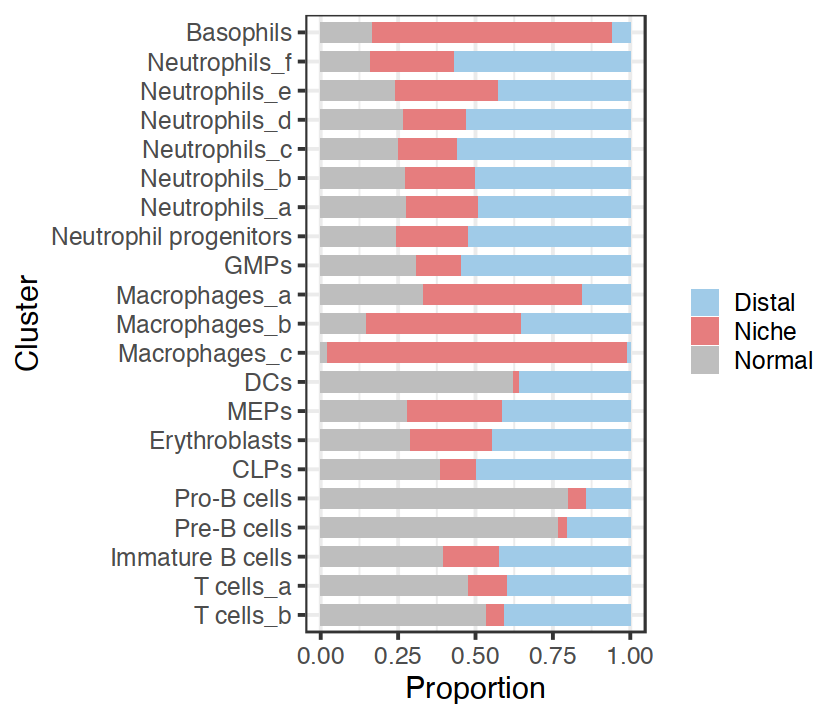

In [14]:
fig_size(6, 7)
percentage <- table(Idents(combined.renamed), combined.renamed$orig.ident)
percentage <- as.data.frame(percentage)
percentage$Var1 <- as.character(percentage$Var1)
percentage$Var1 <- factor(percentage$Var1, levels = my_levels)
ggplot(percentage, aes(x = Freq, y = Var1, fill = Var2) )+
      theme_bw(base_size = 18) +
      geom_col(position = "fill", width = 0.7) +
      xlab("Proportion") +
      ylab("Cluster") +
      theme(legend.title = element_blank()) +
      scale_fill_manual(values = c("#A0CBE8","#E67D7E","grey"))

## Figure S1

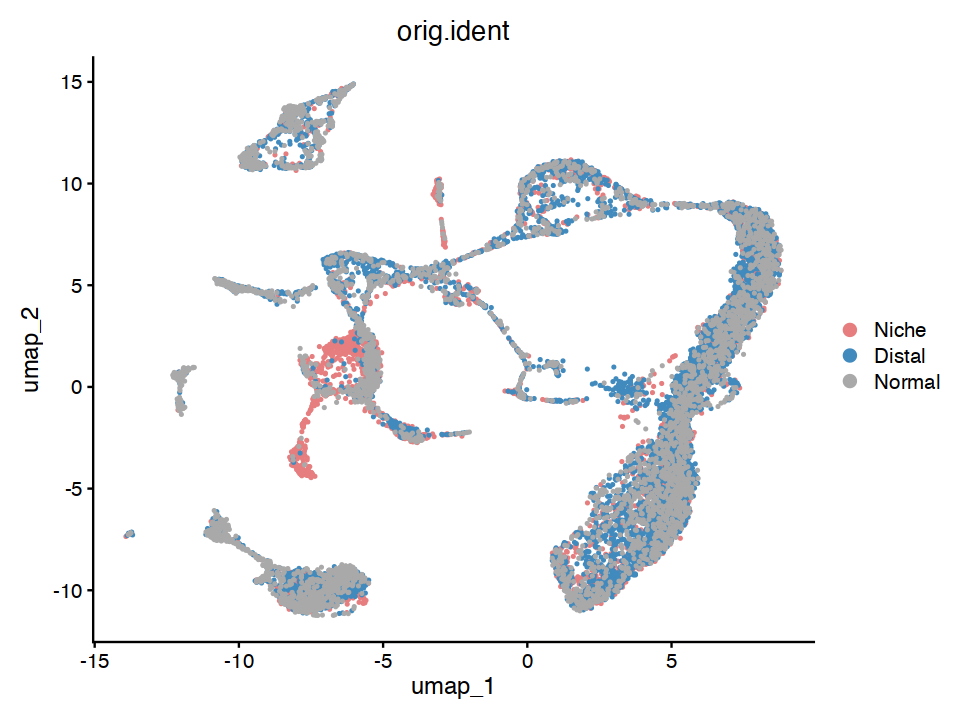

In [11]:
fig_size(6, 8)
DimPlot(combined, 
        reduction ="umap", 
        group.by ="orig.ident", 
        cols = c("#E67D7E","#418abd", "darkgrey"),
        pt.size=0.4, 
        order = c("Normal","Distal","Niche"))

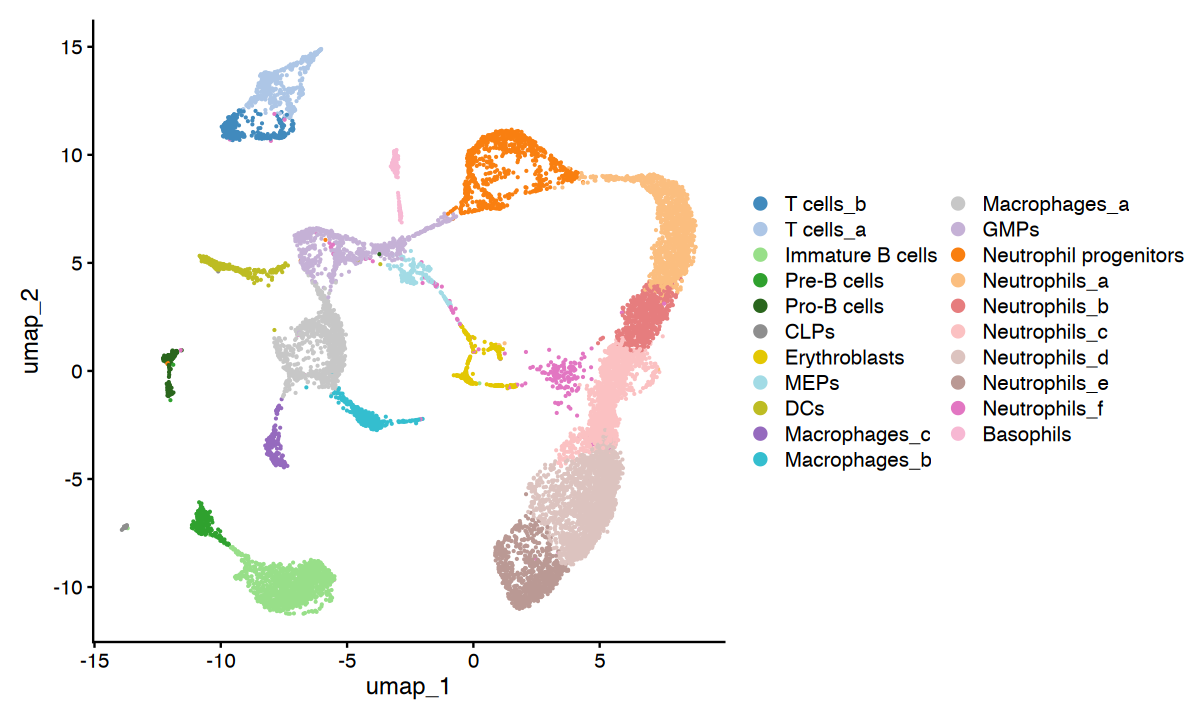

In [11]:
fig_size(6, 10)
DimPlot(combined.renamed, 
        reduction ="umap", 
        cols = mycolors3)

In [24]:
# Calculate and plot percentage of each cluster
percentage <- table(Idents(combined.renamed), 
                    combined.renamed$orig.ident)
percentage <- as.data.frame(percentage)
percentage$Var1 <- as.character(percentage$Var1)
percentage$Var1 <- factor(percentage$Var1, levels = my_levels)

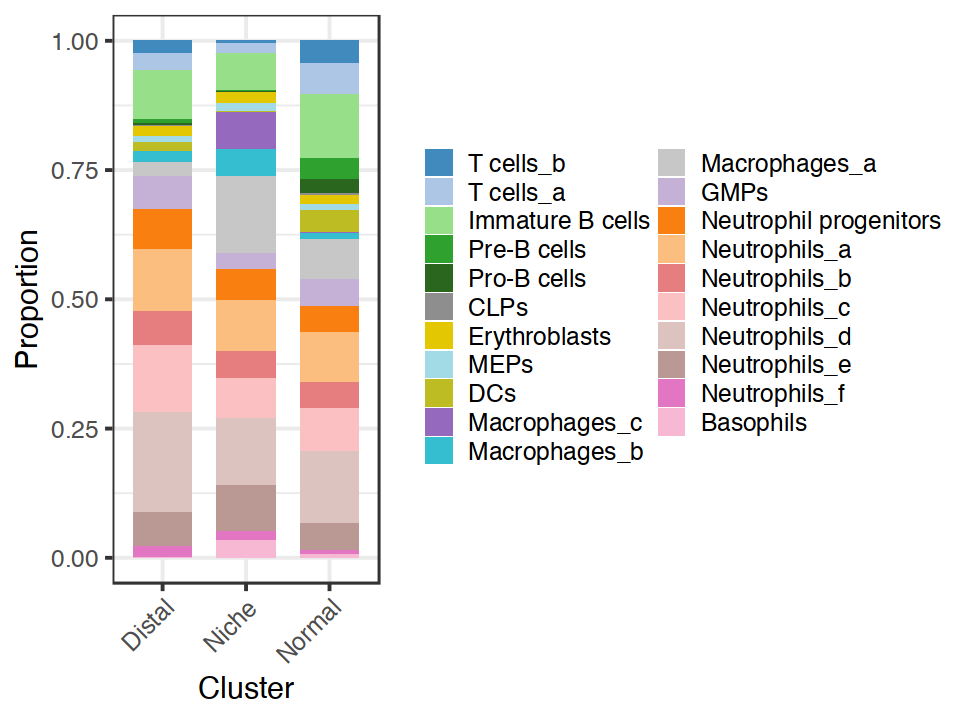

In [15]:
fig_size(6, 8)
ggplot(percentage, aes(x = Var2, y = Freq, fill = Var1) )+
      theme_bw(base_size = 18) +
      geom_col(position = "fill", width = 0.7) +
      xlab("Cluster") +
      ylab("Proportion") +
      theme(legend.title = element_blank()) +
      scale_fill_manual(values = mycolors3) + RotatedAxis()

In [11]:
# subset macrophages
macrophages <-subset(x = combined.renamed, 
                     idents = c("Macrophages_a","Macrophages_b","Macrophages_c"))

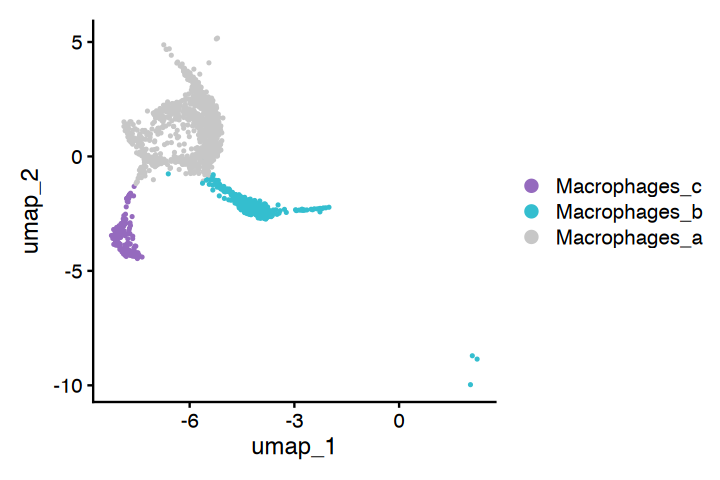

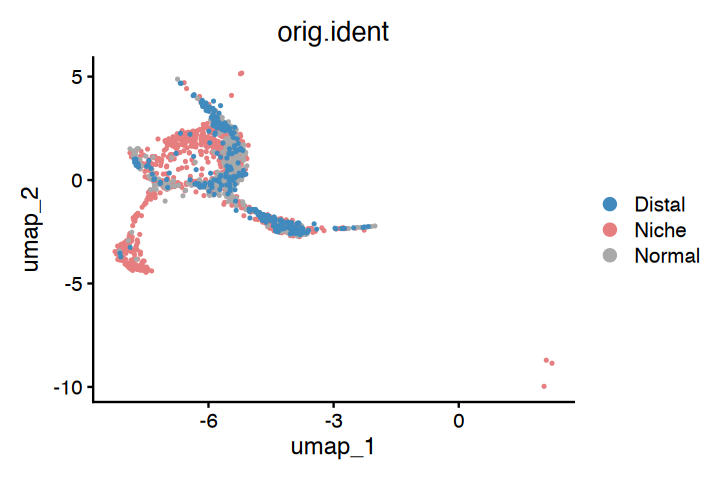

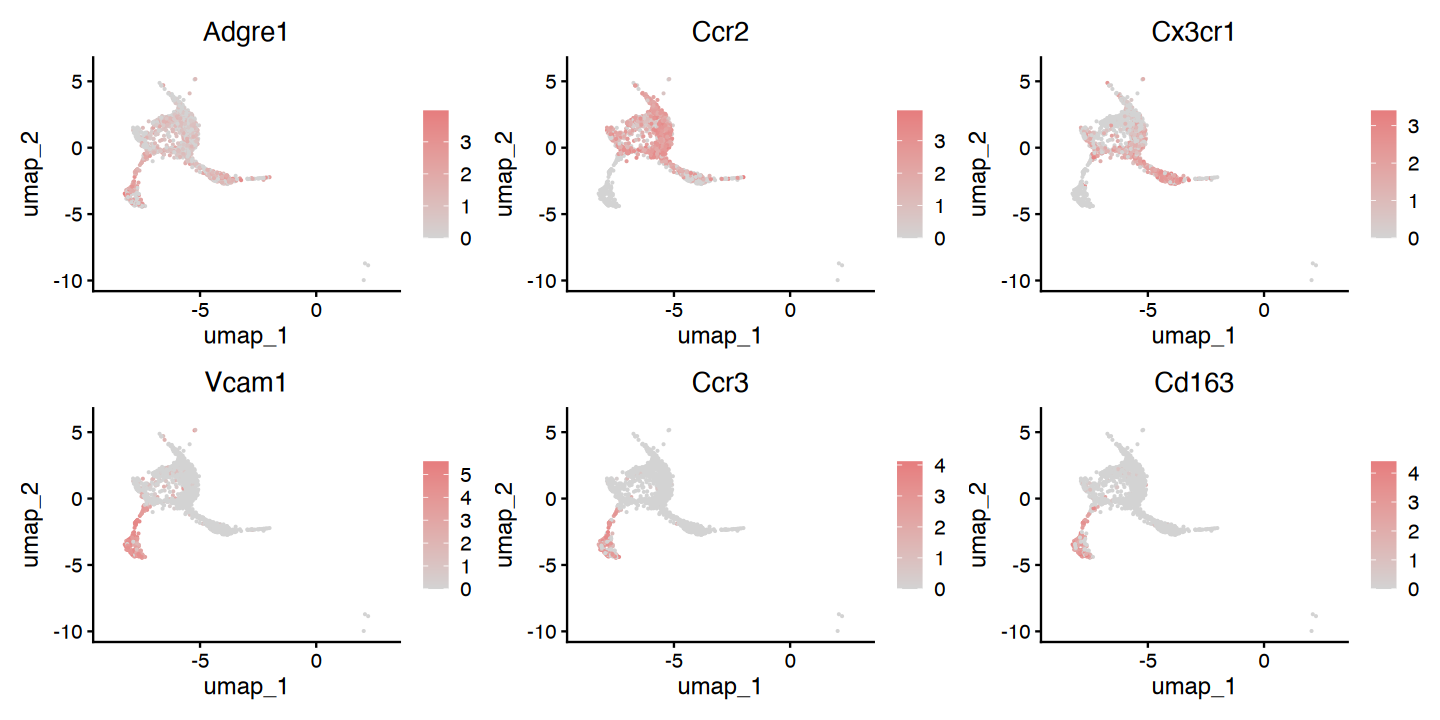

In [16]:
fig_size(4, 6)
DimPlot(macrophages, 
        reduction = "umap",
        cols=c("#956ABE","#34BECF", "#C7C7C7"),
        pt.size=0.4)

DimPlot(macrophages, 
        group.by ="orig.ident", 
        reduction = "umap",
        cols=c("#418abd","#E67D7E", "darkgrey"),
        pt.size=0.4)

DefaultAssay(macrophages) <- "RNA"
fig_size(6, 12)
FeaturePlot(macrophages, 
            features = c("Adgre1","Ccr2","Cx3cr1","Vcam1", "Ccr3","Cd163"),
            cols = c("lightgrey", "#E67D7E"),
            pt.size=0.1, 
            ncol =3)

## Figure 2

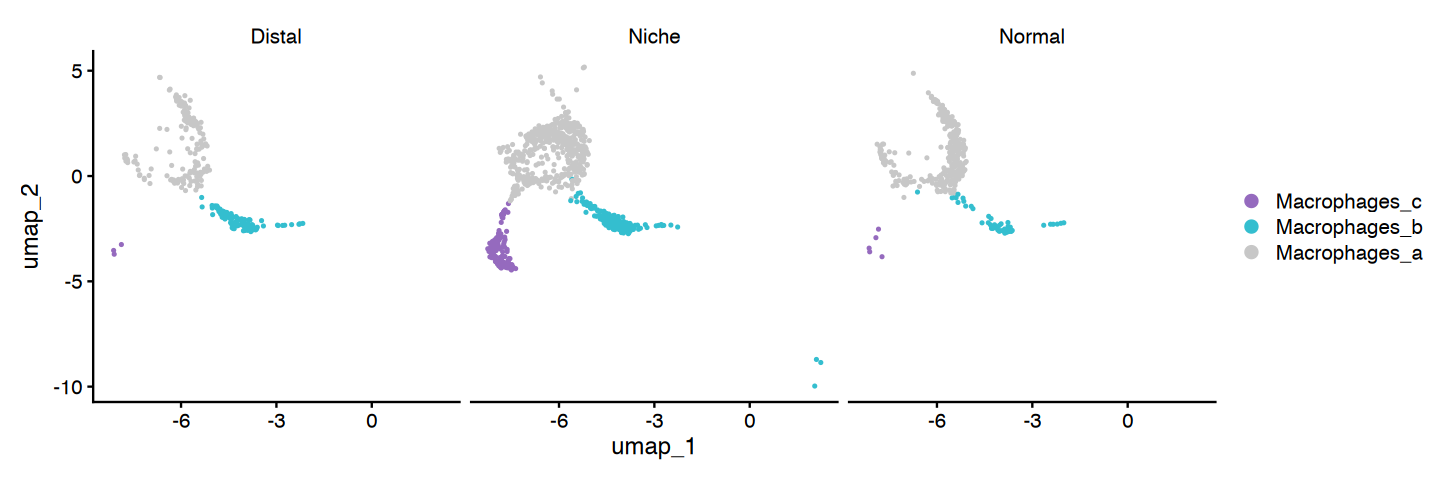

In [17]:
fig_size(4, 12)
DimPlot(macrophages, 
        reduction = "umap",
        cols=c("#956ABE","#34BECF", "#C7C7C7"),
        pt.size=0.4,
        split.by = "orig.ident")

In [18]:
# Calculate EBI functional gene score in macrophage subsets
EBI<-c("Trf","Tfrc","Slc11a2","Fth1","Ftl1","Slc25a37",
            "Slc40a1",
            "Hmox1","Slc48a1","Lrp1","Blvrb",
            "Cd163","Siglec1","Vcam1",
            "Spic","Maf","Pparg")
macrophages <- AddModuleScore(object = macrophages, 
                              features = EBI,
                              name = 'EBI')

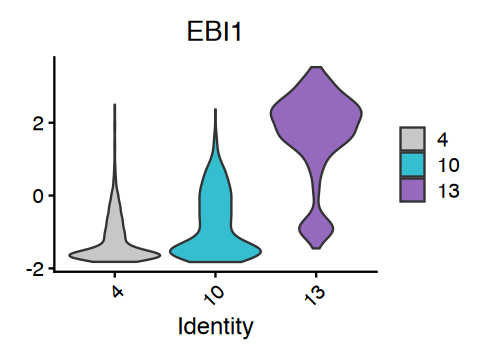

In [19]:
fig_size(3, 4)
VlnPlot(macrophages, 
        group.by="seurat_clusters",
        features = "EBI1", 
        pt.size=0, 
        cols =c("#C7C7C7","#34BECF","#956ABE"))


In [20]:
#Perform DE analysis: "Macrophages_c" vs "Macrophages_a" and "Macrophages_b"
#Filter genes only upregulated in "Macrophages_c" with Log2FC>0.25
DE_Mac_c <-FindMarkers(
    macrophages,
    ident.1 = "Macrophages_c",
    ident.2 = c("Macrophages_a","Macrophages_b"),
    only.pos = TRUE,
    min.pct = 0.1,
    logfc.threshold = 0.25)

In [21]:
# Perform Enrichment/Over-Representation analysis with hallmark genesets
msigdb_hm <- read.gmt("/Users/yujiaoh/Princeton Dropbox/Yujiao Han/0-My Dropbox/Manuscript/Yujiao_Manuscript_v4/dataflie/mh.all.v2023.2.Mm.symbols.gmt.txt")
overrep_gene_list <- rownames(DE_Mac_c)
overrep_msigdb_hm <- enricher(gene = overrep_gene_list, 
                              TERM2GENE = msigdb_hm, 
                              pAdjustMethod = "BH",
                              pvalueCutoff = 0.05)
head(overrep_msigdb_hm)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,72/921,197/4289,5.019004e-07,2.449494e-05,1.804891e-05,Ywhaq/Cct3/Snrpa/Eif4e/Etf1/Snrpd3/Uba2/Cbx3/Rsl1d1/Xpo1/Ruvbl2/Hnrnpr/Snrpb2/Srsf2/Srsf1/Pcbp1/Eif3b/Hdgf/Clns1a/Tardbp/Srpk1/Ndufab1/Cul1/Pa2g4/Cnbp/G3bp1/Iars/Nop16/Psmd1/C1qbp/Trim28/Tomm70a/Tufm/Hspd1/Prdx3/Ilf2/Ncbp1/Hdac2/Srm/Odc1/Orc2/Ncbp2/Pcna/Tfdp1/Canx/Stard7/Rfc4/Gnl3/Pwp1/Hprt/Vdac1/Xpot/Gspt1/Hddc2/Rad23b/Fam120a/Abce1/Cdk2/Mcm7/Eif4g2/Kpnb1/Mcm5/Ywhae/Mcm2/Rrm1/Mcm6/Cstf2/Pabpc4/Prps2/Hsp90ab1/Pabpc1/Cox5a,72
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,72/921,200/4289,9.797977e-07,2.449494e-05,1.804891e-05,Lpl/Apoe/Mrap/Sult1a1/Cmbl/Fabp4/Mgll/Abca1/Idh3g/Chuk/Aplp2/Baz2a/Aco2/Ndufab1/Ywhag/Ppm1b/Immt/Dld/Ucp2/Prdx3/Rreb1/Echs1/Phyh/Reep5/Rnf11/Rtn3/Esrra/Dnajc15/Coq5/Sod1/Dhrs7b/Crat/Ghitm/Hibch/Coq9/Cd151/G3bp2/Vegfb/Ubqln1/Dbt/Dgat1/Araf/Gpx4/Cox6a1/Acads/Cpt2/Idh3a/Slc25a1/Rmdn3/Bcl2l13/Chchd10/Uck1/Hadh/Dnajb9/Cat/Scp2/Arl4a/Dram2/Idh1/Acox1/Sdhc/Cd302/Pparg/Map4k3/Acadm/Aldh2/Qdpr/Decr1/Agpat3/Por/Etfb/Itsn1,72
HALLMARK_PROTEIN_SECRETION,HALLMARK_PROTEIN_SECRETION,HALLMARK_PROTEIN_SECRETION,39/921,94/4289,7.662023e-06,1.277004e-04,9.409502e-05,Arfgef1/Ap3b1/Rab2a/Abca1/Vps4b/Rab5a/Ap2m1/Dst/Gosr2/Vamp4/Golga4/Tsg101/Snap23/Vamp3/Gbf1/Napa/Napg/Bet1/Atp6v1h/Cd63/Sod1/Mon2/Clcn3/Ocrl/Vps45/Scamp1/Sec24d/Ap1g1/Cltc/Tmx1/Yipf6/Stx12/Ctsc/Arf1/Arfgef2/M6pr/Gnas/Kif1b/Galc,39
HALLMARK_PEROXISOME,HALLMARK_PEROXISOME,HALLMARK_PEROXISOME,39/921,102/4289,7.123926e-05,8.904908e-04,6.561511e-04,Cadm1/Prdx1/Vps4b/Aldh9a1/Pex2/Cnbp/Sod1/Nudt19/Pex13/Elovl5/Ercc3/Crat/Eci2/Abcd3/Cln6/Hsd17b4/Cln8/Isoc1/Ide/Gnpat/Pex11b/Top2a/Cat/Ywhah/Pex5/Scp2/Mlycd/Idh2/Acsl4/Pex6/Slc35b2/Idh1/Acox1/Slc23a2/Fads1/Atxn1/Dhrs3/Abcc5/Pabpc1,39
HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_FATTY_ACID_METABOLISM,52/921,155/4289,2.683630e-04,2.683630e-03,1.977411e-03,Glul/Gpd1/Hpgd/Ephx1/Idh3b/Mgll/Cpt1a/Idh3g/Aldh9a1/Aco2/Acadvl/Dld/Hsph1/Ube2l6/Aldh3a2/Echs1/Odc1/Elovl5/Crat/Eci1/Hibch/Sdha/Metap1/Eci2/Ccdc58/Hsd17b4/Hmgcs1/Rap1gds1/Hsdl2/Hsp90aa1/Acads/Cpt2/Nsdhl/Hadh/Ywhah/Gabarapl1/Trp53inp2/Mlycd/Cpox/Acsl4/Blvra/Hadhb/Serinc1/Idh1/Acox1/Acot2/Sdhc/Acadm/Suclg2/Acss1/Decr1/Mdh1,52
HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,59/921,195/4289,2.066921e-03,1.722434e-02,1.269162e-02,Ndufs6/Idh3b/Cpt1a/Ndufc2/Idh3g/Iscu/Hadha/Acat1/Aco2/Atp6v1e1/Acadvl/Ndufab1/Immt/Dld/Tomm70a/Atp6ap1/Prdx3/Ogdh/Atp5g3/Atp6v1h/Atp6v1d/Echs1/Opa1/Phyh/Cyb5r3/Ndufs1/Oat/Eci1/Sdha/Lrpprc/Vdac1/Mrpl35/Cox15/Mfn2/Casp7/Aldh6a1/Ndufa2/Acadsb/Atp6v1f/Gpx4/Rhot2/Atp6v0c/Cox6a1/Pdhx/Idh3a/Atp6v1g1/Hspa9/Idh2/Hadhb/Idh1/Sdhc/Acadm/Decr1/Mdh1/Por/Atp5a1/Etfb/Cyb5a/Cox5a,59


## Figure S2

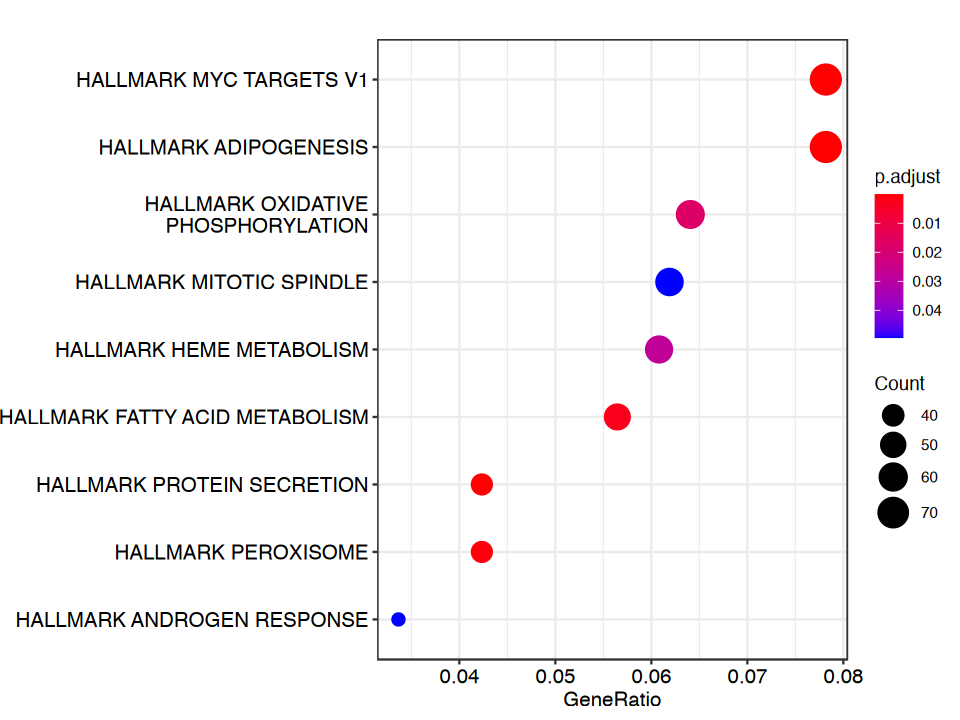

In [22]:
fig_size (6,8)
dotplot(overrep_msigdb_hm, 
        showCategory = 10)

## Figure S7

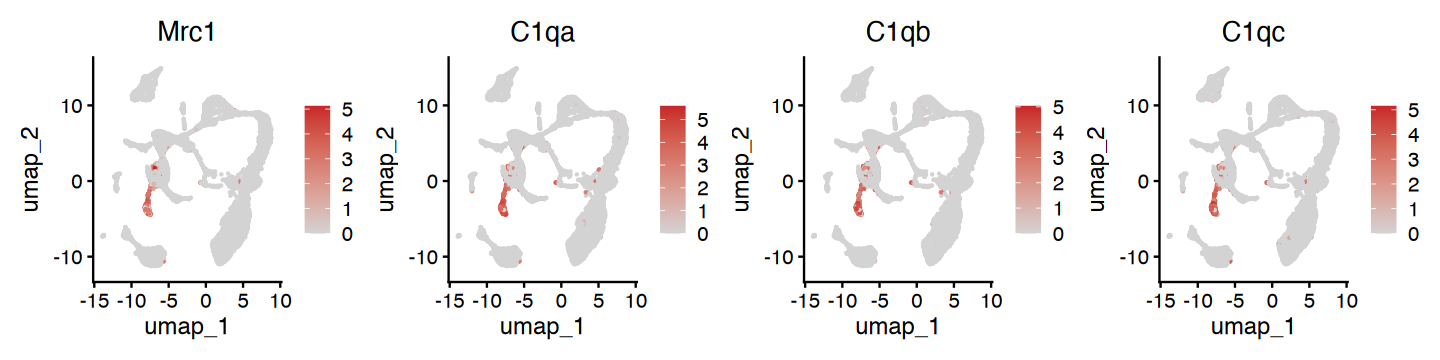

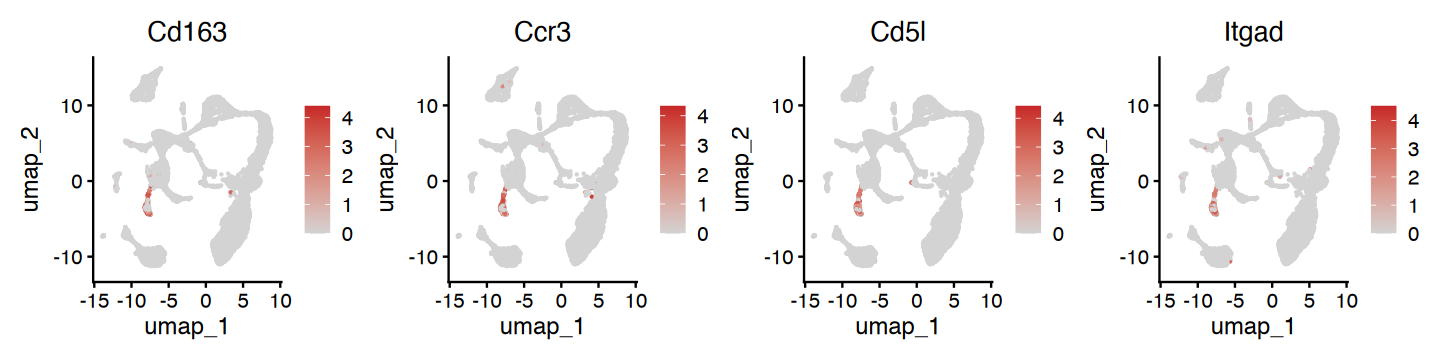

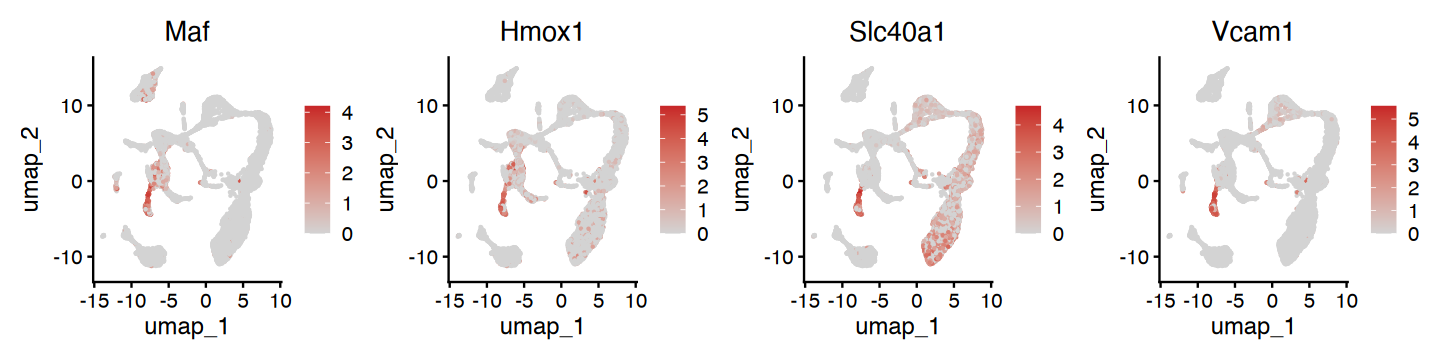

In [44]:
# Visualization of iMac signature genes across all bone marrow cells (in parallel with human data)
DefaultAssay(combined.renamed) <- "RNA"
fig_size (3,12)
FeaturePlot(combined.renamed, 
            features = c("Mrc1","C1qa","C1qb","C1qc"), 
            cols=c("lightgrey","#c72628"),
            pt.size = 0.2, 
            ncol = 4)
FeaturePlot(combined.renamed, 
            features = c("Cd163","Ccr3","Cd5l","Itgad"), 
            cols=c("lightgrey","#c72628"),
            pt.size = 0.2, 
            ncol = 4)
FeaturePlot(combined.renamed, 
            features = c("Maf","Hmox1","Slc40a1","Vcam1"), 
            cols=c("lightgrey","#c72628"),
            pt.size = 0.2, 
            ncol = 4,
            order = F)

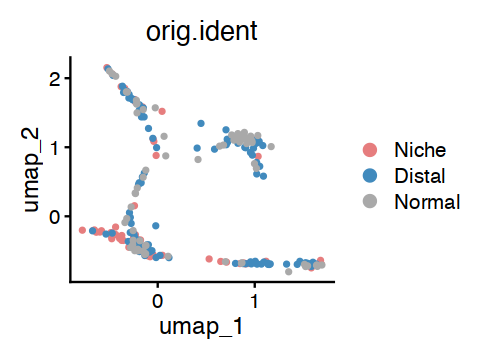

In [17]:
# Subset erythroblast
EBcolors<-c("#ADC6E6","#FBC1C2","#FBBE7F","#C5B1D6")
EB <-subset(x = combined.renamed, 
            idents = c("Erythroblasts"))

fig_size (3,4)
DimPlot(EB, 
        reduction = "umap",
        group.by = "orig.ident", 
        cols = c("#E67D7E","#418abd", "darkgrey"),
        order = c("Normal","Distal","Niche"))

## Figure 4

Computing nearest neighbor graph

Computing SNN

Only one graph name supplied, storing nearest-neighbor graph only



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 248
Number of edges: 2256

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8592
Number of communities: 4
Elapsed time: 0 seconds


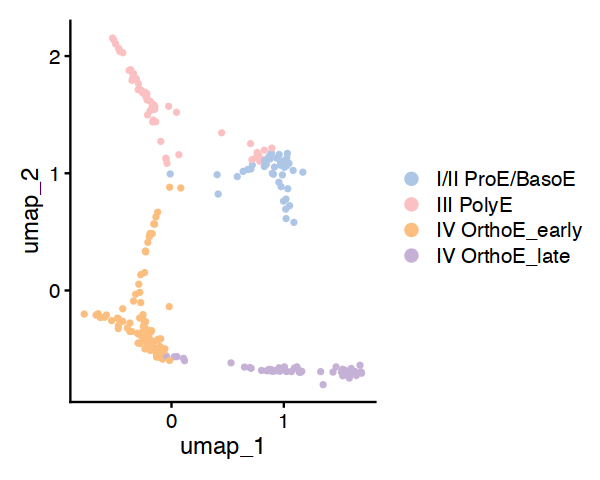

In [28]:
# Subcluster erythroblast
EB<- FindNeighbors(EB, dims = 1:10,graph.name = "test")

EB<- FindClusters(EB,
                  graph.name = "test",
                  resolution = 0.3, 
                  algorithm = 1, 
                  verbose = TRUE)

desired_order <- c("3", "1", "0","2")
EB$test_res.0.3 <- factor(EB$test_res.0.3,levels = desired_order)

EB <- RenameIdents(object = EB, 
                               "3" = "I/II ProE/BasoE",
                               "1" = "III PolyE",
                               "0" = "IV OrthoE_early",
                               "2" = "IV OrthoE_late")
fig_size (4,5)
DimPlot(EB, 
        label = FALSE, 
        label.size = 6, 
        pt.size= 1,
        cols= EBcolors)

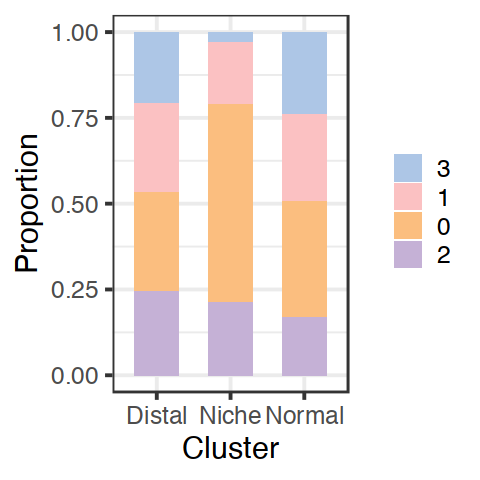

In [47]:
# Calculate and plot the percentage of cells in each cluster
percentage <- table(EB$test_res.0.3, EB$orig.ident)
percentage <- as.data.frame(percentage)
fig_size (4,4)
ggplot(percentage, aes(x = Var2, y = Freq, fill = Var1)) +
  theme_bw(base_size = 18) +
  geom_col(position = "fill", width = 0.6) +
  xlab("Cluster") +
  ylab("Proportion") +
  theme(legend.title = element_blank()) +
  scale_fill_manual(values = EBcolors)

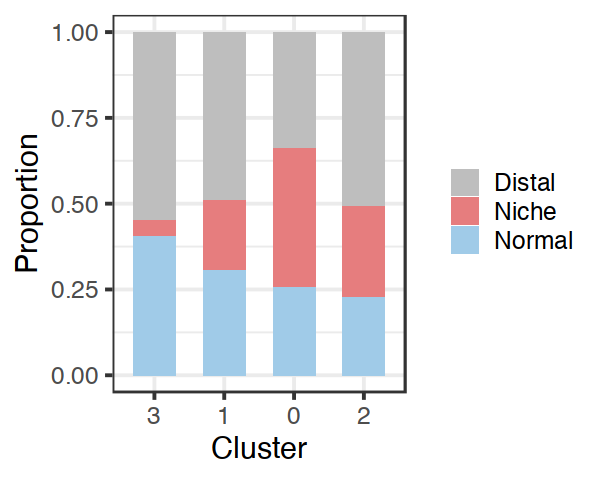

In [30]:
fig_size (4,5)
ggplot(percentage, aes(x = Var1, y = Freq, fill = Var2)) +
  theme_bw(base_size = 18) +
  geom_col(position = "fill", width = 0.6) +
  xlab("Cluster") +
  ylab("Proportion") +
  theme(legend.title = element_blank())+
  scale_fill_manual(values = c("grey","#E67D7E","#A0CBE8"))

## Figure S4

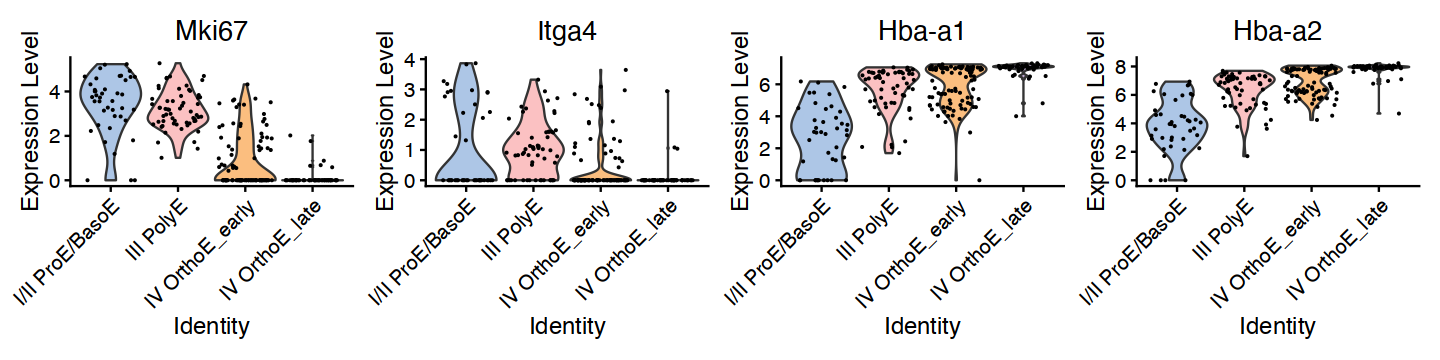

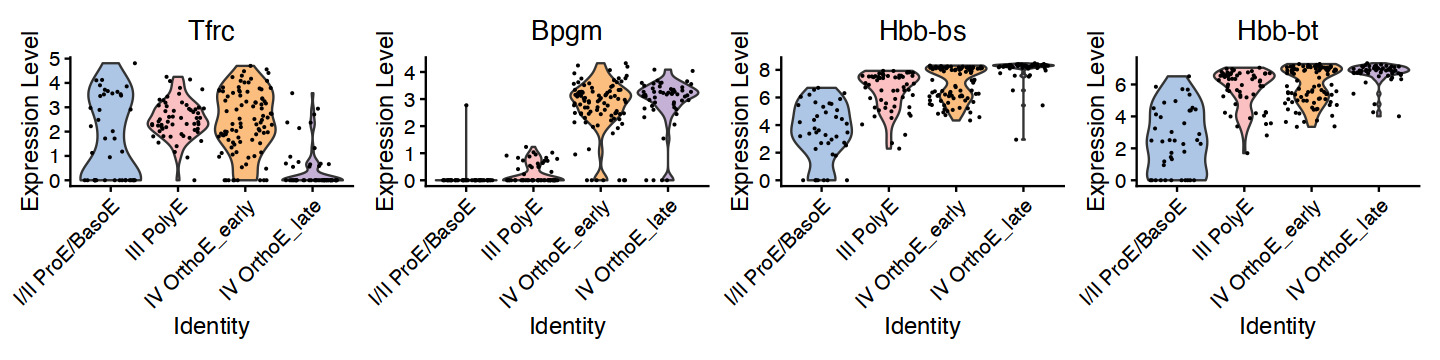

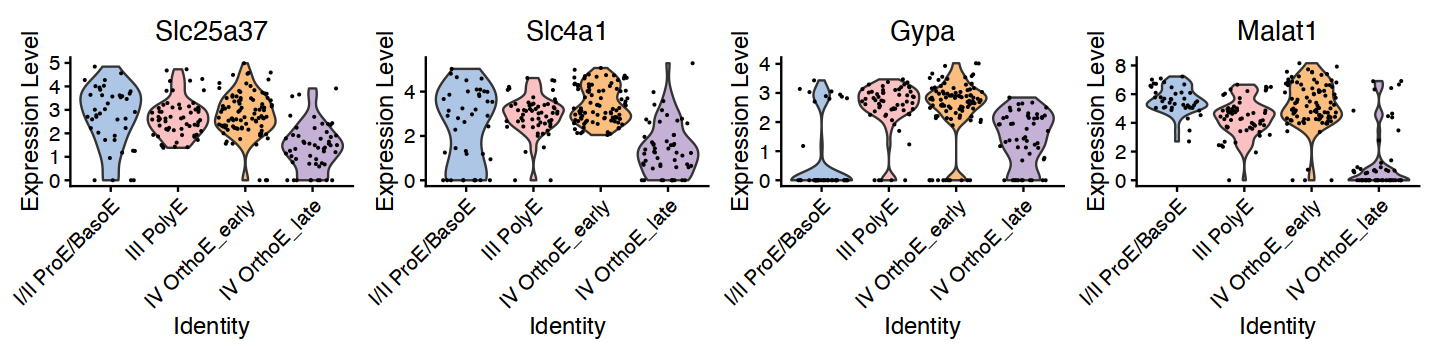

In [32]:
# Plot marker genes

DefaultAssay(EB)<-"RNA"

fig_size (3,12)
VlnPlot(EB, 
        features = c("Mki67","Itga4","Hba-a1","Hba-a2"), 
        ncol = 4, 
        cols=EBcolors)
VlnPlot(EB, 
        features = c('Tfrc',"Bpgm",'Hbb-bs',"Hbb-bt"), 
        ncol = 4, 
        cols=EBcolors)
VlnPlot(EB, 
        features = c("Slc25a37","Slc4a1","Gypa","Malat1"), 
        ncol = 4, 
        cols=EBcolors)

Picking joint bandwidth of 0.242

Picking joint bandwidth of 4.23e-06

Picking joint bandwidth of 0.122

Picking joint bandwidth of 5.13e-06



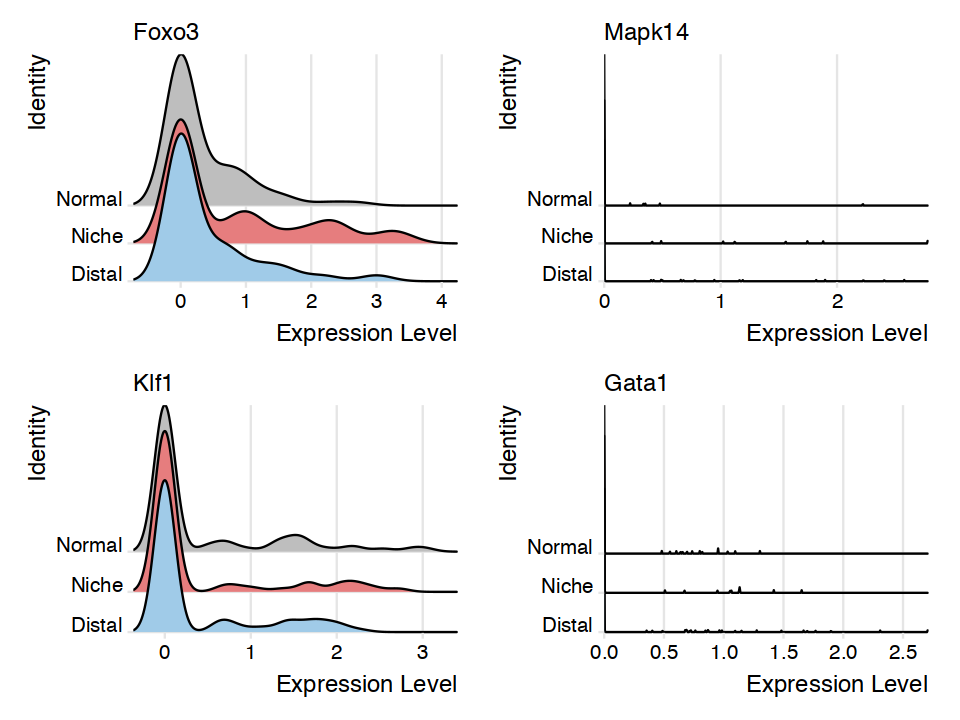

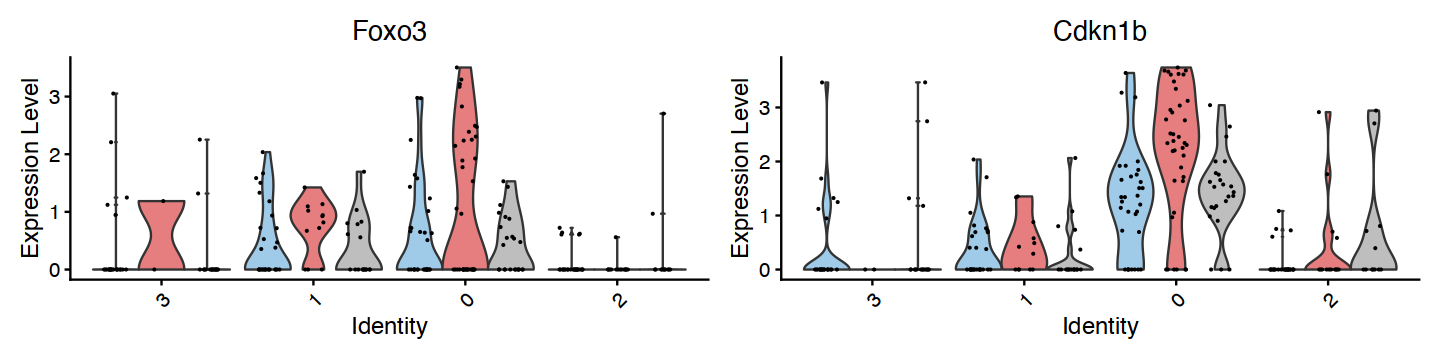

In [49]:
# Plot enucleationTFs
enucleationTF = c("Foxo3","Mapk14","Klf1","Gata1")
fig_size (6,8)
RidgePlot(EB, 
          features = enucleationTF, 
          group.by = "orig.ident",  
          cols=c("#A0CBE8","#E67D7E","grey"), 
          ncol = 2)
fig_size (3,12)
VlnPlot(EB, 
        features = c("Foxo3","Cdkn1b"),  
        split.by = "orig.ident", 
        group.by = "test_res.0.3", 
        cols=c("#A0CBE8","#E67D7E","grey"), 
        ncol = 2, 
        pt.size=0.1)